# Linear Regression on Predicting Severity using parameters in CAPE-V 


## Background

# Perceptron-Based Gender Voice Classification

In this project, we will develop a perceptron model, one of the simplest types of artificial neural networks, to classify audio recordings into male or female voices. 

The biological differences between male and female voices primarily lie in pitch and formant frequencies. **Typically, male voices have a lower pitch and different formant frequencies compared to female voices due to variations in vocal tract and larynx size.** These acoustic features can be quantified and used as inputs to our perceptron, enabling it to learn and predict the gender associated with a voice recording. This approach not only serves as a practical application of machine learning in the field of voice speech language pathology but also provides insights into how gender characteristics influence voice acoustics.

<p align="center">
    <img src="gender voice.jpg" width="300">
</p>


# Understanding Voice and Gender: Why does this matter? 

Generally speaking, the human ear uses the pitch of voices as a reference for gender identification. In clinical terms, "pitch" is perceived as both mean frequency and fundamental frequency. As speech-language pathologists specializing in voice, I provide services for individuals seeking to modify their voice to better align with their gender identity. This service is known as **voice feminization** or **voice masculinization.**

## Techniques for Voice Modification

One of the primary techniques we use involves teaching clients how to modify the pitch at which they speak. This adjustment is tailored to each individual and progresses incrementally.

## Voice Evaluation Parameters


During voice evaluation, we establish a range for male and female voice frequencies. For instance:
- **The fundamental frequency (F0) range for a female voice: 160 Hz to 270 Hz.**
- **For a male voice, from 80 Hz to 175 Hz.**

<p align="center">
    <img src="phonation_vowel.png" width="500">
</p>

Fundamental frequency is measured through a 3-5 five-second long sustained phonation "Ahh". This frequency is a crucial criterion for voice evaluation, not only because it represents an aspect of our gender identity but also because variations in pitch can indicate potential vocal damage. For example:
- An irregularly low pitch voice may signal damage to the pitch-controlling nerve, a common side effect of thyroid surgery.
- Additionally, puberphonia, a disorder where males post-puberty retain a high-pitched voice akin to that of preadolescent boys, can also be detected through these evaluations.

## Acoustic Parameters in Voice Evaluation

Voice evaluation often utilizes a variety of acoustic parameters to assess and characterize voice quality. These parameters provide quantifiable measures that are crucial in the fields of speech-language pathology and voice therapy. Below are some of the primary acoustic parameters used in voice evaluation:

### Fundamental Frequency (F0)

- **Description**: Fundamental frequency, often denoted as F0, represents the lowest frequency of a voice's harmonic series. It is generally perceived as the "pitch" of the voice.
- **Gender Differences**: In adults, typical male voices have a lower F0 compared to female voices. For instance, average F0 values for adult males range from approximately 85 to 155 Hz, while for adult females, the range is about 165 to 255 Hz during sustained phonation tasks. This difference is primarily due to the larger size and mass of the male vocal folds, which vibrate at a slower rate.

### Mean Frequency

- **Description**: Mean Frequency, often expressed as the average frequency across a given speech sample, measures the central tendency of the frequency distribution of the voice signal. Unlike specific formant frequencies which relate to the resonant frequencies of the vocal tract, Mean Frequency encompasses the entire range of frequencies generated during speech. It is computed by averaging all frequencies present in the speech spectrum during a particular speaking task, such as spontaneous speech or reading aloud.

- **Measurement**: This measure can be obtained using spectral analysis techniques that break down the speech signal into its frequency components. In tasks like spontaneous speech or reading, where the speech flow is continuous and dynamic, spectral analysis tools track the frequency values across the entire speech segment and compute their average. 

- **Distinguishing from Mean Fundamental Frequency (F0)**: While "Mean Frequency" refers to the average of all frequencies in a speech sample, "Mean Fundamental Frequency" specifically refers to the average of the lowest frequencies in the speech that are repetitive (fundamental frequencies of the vocal fold vibrations). F0 provides a specific measure related to pitch, whereas Mean Frequency gives a broader view of the voice's frequency content, including both harmonic (voice-related) and non-harmonic parts (noise or other sounds).

- **Gender Differences**: Typically, males have a lower Mean Frequency as well as a lower Mean Fundamental Frequency compared to females, reflecting differences in vocal fold size and vocal tract length. However, Mean Frequency captures a wider range of the spectral content, which can vary significantly depending on the speaking context and vocal effort, beyond anatomical differences.


## The Dataset

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

Dataset Source: [Gender Recognition by Voice (Kaggle)](https://www.kaggle.com/datasets/primaryobjects/voicegender)

In [4]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import seaborn as sns
sns.set_theme()

In [5]:
df = pd.read_csv('/Users/ruiqingfan/Documents/INDE-577-24/INDE-577-24-1/Combined_PVQD_CAPEV.csv', delimiter=',')
df.dataframeName = 'Combined_PVQD_CAPEV.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

df.head(10)

There are 297 rows and 10 columns


,Participant ID,Gender,Age,Diagnosis,Severity,Roughness,Pitch,Loudness,Breathiness,Strain
0,BL01,M,46,NaN,14.500000,9.500000,6.333333,9.666667,4.500000,4.500000
1,BL02,F,76,NaN,73.833333,65.000000,36.166667,54.833333,54.833333,58.333333
2,BL03,F,88,NaN,65.833333,56.166667,41.166667,37.166667,32.333333,44.500000
3,BL04,F,42,NaN,9.500000,6.166667,12.833333,5.833333,6.166667,5.166667
4,BL05,F,75,NaN,43.000000,34.666667,15.333333,29.500000,40.166667,26.666667
5,BL06,F,65,NaN,88.833333,20.166667,63.500000,75.666667,79.833333,81.500000
6,BL07,F,24,NaN,14.833333,12.166667,10.500000,6.333333,7.833333,11.500000
7,BL08,F,27,NaN,17.833333,13.500000,15.166667,5.333333,14.166667,11.166667
8,BL09,M,70,NaN,32.666667,23.166667,12.500000,23.166667,5.666667,37.666667
9,BL10,F,21,NaN,19.333333,9.666667,10.833333,4.166667,20.000000,6.833333


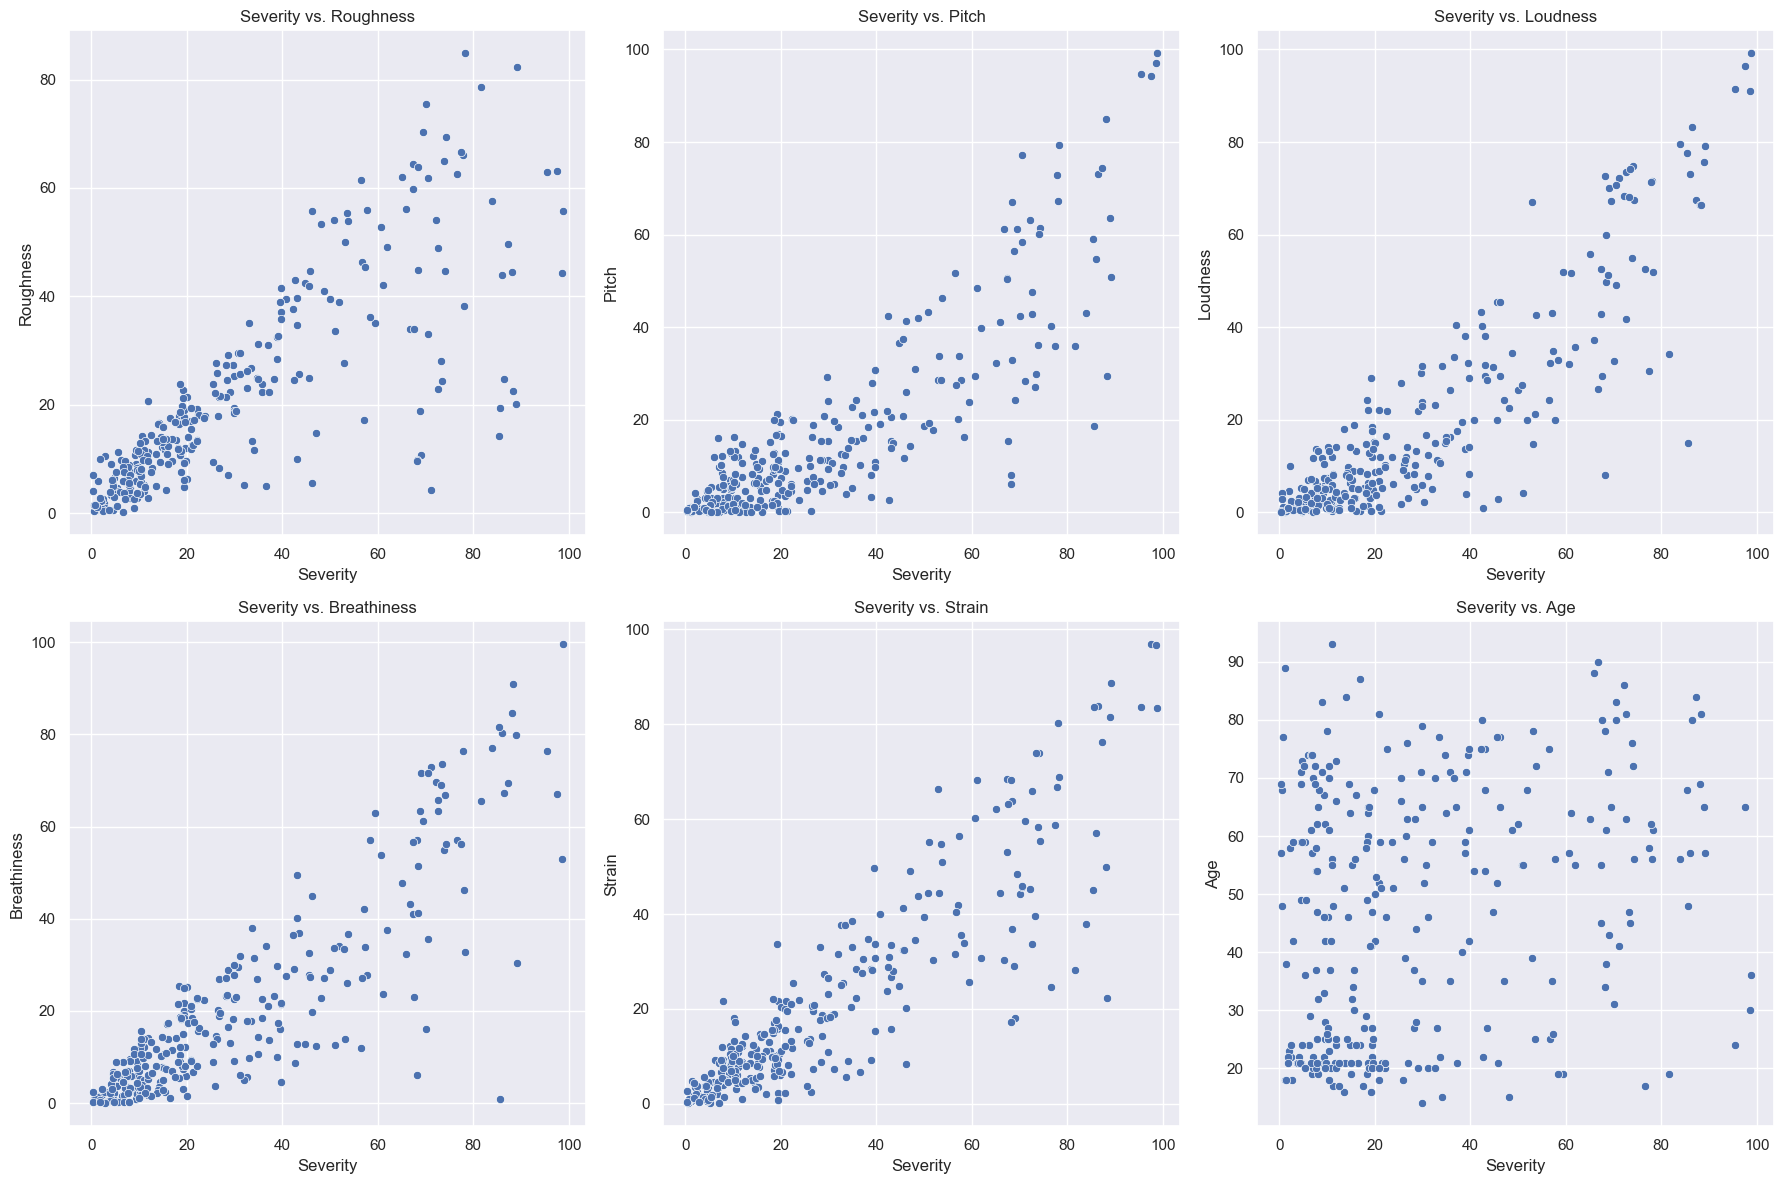

In [14]:
# List of variables to plot with 'Severity'
variables = ['Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Loop through the variables to create scatterplots
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 3, i)  # Plotting on a 2x3 grid
    sns.scatterplot(data=df, x='Severity', y=variable)
    plt.title(f'Severity vs. {variable}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [15]:
# Assuming your DataFrame is named 'df'

# Calculating descriptive statistics for selected variables
stats = df[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']].describe()

# Adding skewness and kurtosis
stats.loc['skew'] = df[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']].skew()
stats.loc['kurtosis'] = df[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']].kurt()

print(stats)


            Severity   Roughness       Pitch    Loudness  Breathiness  \
count     296.000000  296.000000  296.000000  296.000000   296.000000   
mean       29.356560   20.699887   16.328829   18.691864    19.778435   
std        25.141730   18.407157   20.139772   22.579619    21.060190   
min         0.333333    0.166667    0.000000    0.000000     0.000000   
25%         9.666667    7.458333    2.656250    3.093750     5.000000   
50%        19.500000   13.708333    9.333333    8.833333    12.208333   
75%        43.041667   27.666667   20.291667   26.875000    27.166667   
max        98.666667   84.833333   99.166667   99.166667    99.500000   
skew        1.005032    1.296683    1.939191    1.598986     1.549618   
kurtosis   -0.069013    1.007225    3.651007    1.742622     1.750984   

              Strain         Age  
count     296.000000  297.000000  
mean       21.089527   46.727273  
std        21.328641   21.737291  
min         0.125000   14.000000  
25%         5.593750 

In [20]:
# Assuming your DataFrame is named 'df' and includes the columns listed below
columns_to_check = ['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain']

# Drop rows where all specified columns are missing values
df_cleaned = df.dropna(subset=columns_to_check, how='all')

# Now df_cleaned will contain only the rows where at least one of the specified columns is not NaN
print("Original DataFrame size:", df.shape)
print("Cleaned DataFrame size:", df_cleaned.shape)


Original DataFrame size: (297, 10)
Cleaned DataFrame size: (296, 10)


Based on the statistical outputs you provided, there are several reasons to consider normalizing your variables before using them in a linear regression model, especially when planning to implement gradient descent. Here’s a breakdown of the reasons:

Range Variation: There is a significant variation in the ranges of the variables. For instance, the maximum values for "Pitch," "Loudness," and "Breathiness" are all close to 100, while "Severity" and other features exhibit different scales. Such disparities can cause issues during the training process, as gradient descent might converge slowly or become unstable.
Standard Deviation Disparity: The standard deviations vary considerably among your features, from as low as 18 for "Roughness" to around 22 for "Loudness." This indicates that the data points are spread out over a range of values differently across features, which can affect the performance of your model.

Skewness and Kurtosis: Many variables show high skewness (values significantly different from zero), indicating the presence of long tails in the distribution. For example, "Pitch" and "Loudness" have skewness values of approximately 1.94 and 1.60, respectively. High kurtosis values for some variables suggest heavy tails or outliers. This can influence the regression model by giving undue weight to these outliers or extreme values, which normalization can help mitigate.


Effect on Gradient Descent: In gradient descent algorithms, features with higher numeric ranges dominate the gradient updates, which can lead to an imbalanced learning process where some features are not effectively learned. Normalizing the data ensures that each feature contributes equally to the distance calculations, leading to more stable and faster convergence.
Given these factors, normalization or standardization would be advisable. Here's how you can normalize your variables using Min-Max scaling and standardization (Z-score normalization):

Standardization (Z-score Normalization)
This centers the data by removing the mean and scales it by dividing by the standard deviation to achieve a variance of 1 and mean of 0.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']]),
                               columns=['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age'])



df_standardized.head(10)

,Severity,Roughness,Pitch,Loudness,Breathiness,Strain,Age
0,-0.591913,-0.609483,-0.497147,-0.400382,-0.726694,-0.779122,-0.038035
1,1.772038,2.410754,0.986676,1.603334,1.667329,1.749145,1.346186
2,1.453303,1.930056,1.235362,0.819593,0.597153,1.099466,1.899874
3,-0.791122,-0.790879,-0.173856,-0.570439,-0.647421,-0.747813,-0.222598
4,0.543580,0.760054,-0.049513,0.479478,0.969733,0.261929,1.300045
5,2.369666,-0.029017,2.346156,2.527558,2.856413,2.837160,0.838638
6,-0.578632,-0.464367,-0.289909,-0.548258,-0.568149,-0.450369,-1.053130
7,-0.459107,-0.391808,-0.057803,-0.592621,-0.266915,-0.466024,-0.914708
8,0.131881,0.134239,-0.190435,0.198514,-0.671203,0.778541,1.069341
9,-0.399344,-0.600413,-0.273330,-0.644377,0.010538,-0.669538,-1.191552


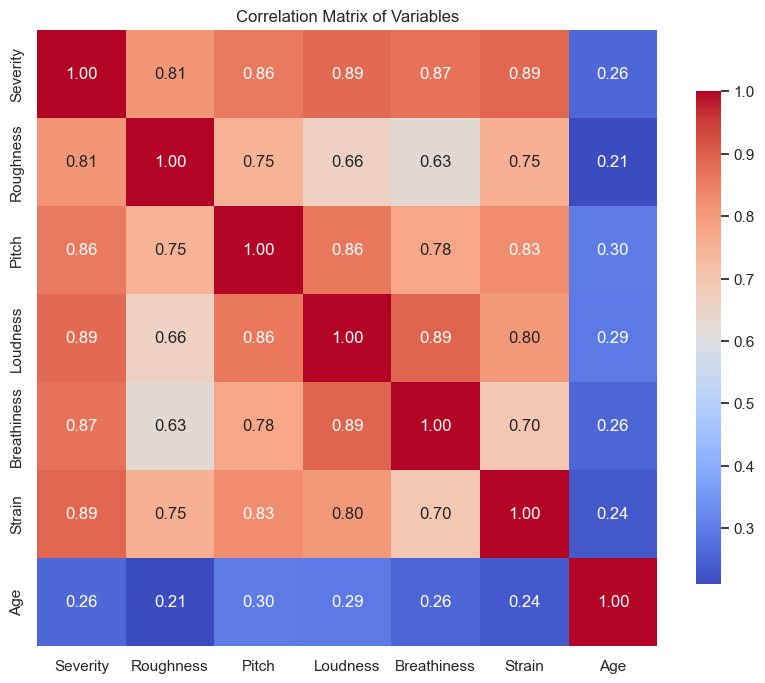

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Calculate the correlation matrix
corr = df_standardized[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Variables')
plt.show()


In [30]:


# Assuming your DataFrame is named 'df' and is already loaded with your data
# Define y as the target variable 'Severity'
y = df_standardized['Severity'].values

# Define X with the specified features
X = df_standardized[['Breathiness', 'Roughness', 'Age', 'Strain', 'Loudness', 'Pitch']].values

# Split the data into training and testing sets
# Test size is set to 33% of the original data and the data is shuffled to ensure randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)


In [31]:
# Set the learning rate
alpha = 0.05

# Initialize arrays to store the MSE values and iterations
gMSE_all = []
nMSE_all = []
i_all = []

# Initialize weights randomly with a scaling factor
theta = np.random.randn(X_train.shape[1]) * np.sqrt(2)

# Calculate initial predictions and MSE for training data
y_hat = X_train @ theta
gMSE = (1 / X_train.shape[0]) * np.sum((y_hat - y_train) ** 2)
gMSE_all.append(gMSE)

In [32]:
for i in range(1000):
    # Make prediction
    y_hat = X_train @ theta

    # Calculate cost (MSE)
    gMSE = (1 / X_train.shape[0]) * np.sum((y_hat - y_train) ** 2)
    gMSE_all.append(gMSE)
    i_all.append(i)

    # Compute gradient
    delta = (2 / X_train.shape[0]) * (X_train.T @ (y_hat - y_train))

    # Update weights
    theta -= alpha * delta

    # Optional: Calculate MSE using normal equations for comparison at each step
    theta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    y_hat = X_train @ theta_hat
    nMSE = (1 / X_train.shape[0]) * np.sum((y_hat - y_train) ** 2)
    nMSE_all.append(nMSE)


In [33]:
# Final predictions on test data
gy_hat = X_test @ theta
ny_hat = X_test @ theta_hat

# Calculate MSE on test data
gMSE = (1 / X_test.shape[0]) * np.sum((gy_hat - y_test) ** 2)    
nMSE = (1 / X_test.shape[0]) * np.sum((ny_hat - y_test) ** 2)   


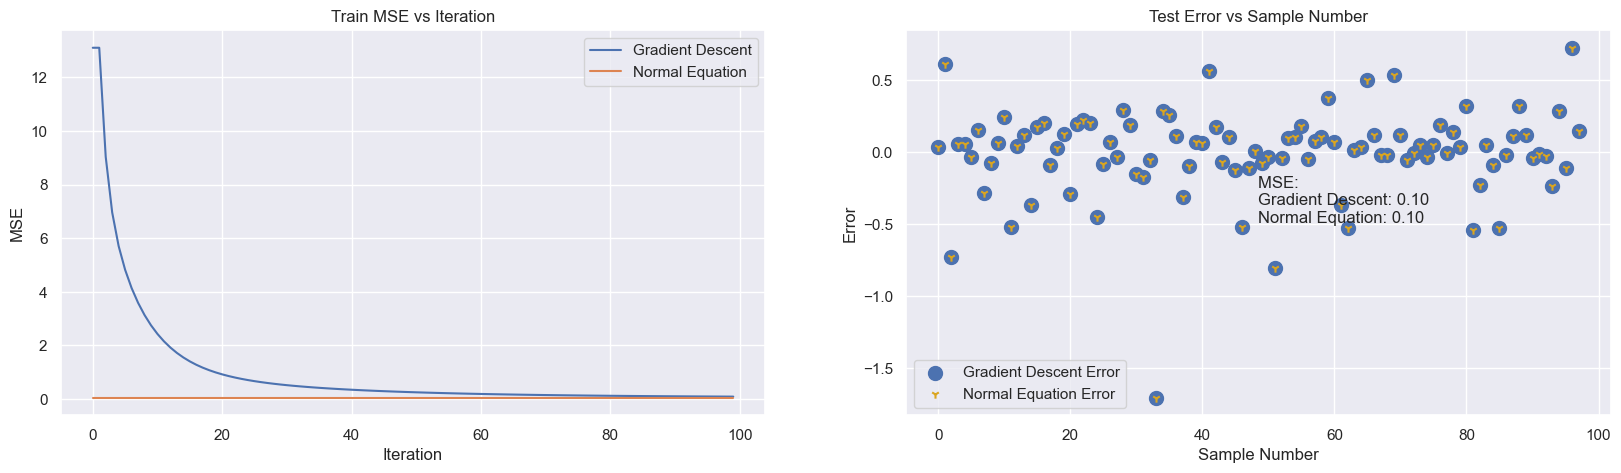

Text(150, 30, 'MSE: \nGradient Descent: 0.1\nNormal Eq: 0.1')

In [35]:


fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot training MSE for first 100 iterations
ax[0].plot(i_all[:100], gMSE_all[:100], label="Gradient Descent")
ax[0].plot(i_all[:100], nMSE_all[:100], label="Normal Equation")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("MSE")
ax[0].set_title("Train MSE vs Iteration")
ax[0].legend()

# Plot test error
ax[1].scatter(range(X_test.shape[0]), gy_hat - y_test, label="Gradient Descent Error", s=100)
ax[1].scatter(range(X_test.shape[0]), ny_hat - y_test, label="Normal Equation Error", color='goldenrod', marker='1')
ax[1].set_xlabel("Sample Number")
ax[1].set_ylabel("Error")
ax[1].set_title("Test Error vs Sample Number")
ax[1].legend()

# Display final MSE values
text = "MSE: \nGradient Descent: {:.2f}\nNormal Equation: {:.2f}".format(gMSE, nMSE)
ax[1].text(0.5, 0.5, text, transform=ax[1].transAxes)
plt.show()

text = "MSE: \n" + "Gradient Descent: " + str(round(gMSE,2)) + "\n" + "Normal Eq: " + str(round(nMSE,2))
ax[1].text(150,30, text)